In [2]:
#!pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio
import cv2

## Unsatisfactory results

As in every project, we faced some issues throughout the process that were revealed to be challenging to solve. In this section, we are going to show some of the images and methods that showed unsatisfactory results.

### Edge extraction by Laplacian method

Along the Canny algorithm, another method for edge extraction we tried was the Laplacian method. However, the results we got weren't as good as Canny's, as shown below

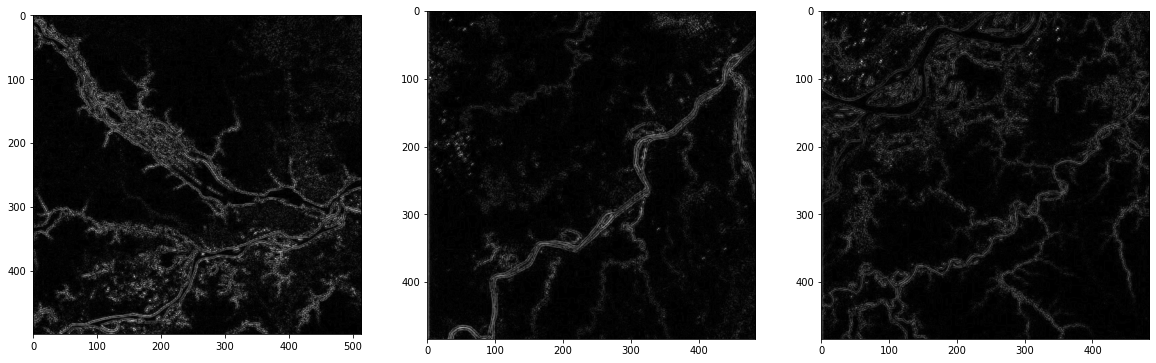

In [27]:
def laplacian_edge_extraction(img_cv):
    cp_img_cv = np.copy(img_cv)
    cp_img_cv[:,:,0] = 0
    cp_img_cv[:,:,2] = 0

    source = cv2.GaussianBlur(cp_img_cv,(3,3),0)
    source_gray = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
    dest = cv2.Laplacian(source_gray, cv2.CV_16S, ksize=3)
    abs_dest = cv2.convertScaleAbs(dest)

    return abs_dest

img_cv = cv2.imread("../imagens/clean/amaz20.jpg", cv2.IMREAD_COLOR)
lap_img1 = laplacian_edge_extraction(img_cv)
img_cv = cv2.imread("../imagens/clean/amaz5.jpg", cv2.IMREAD_COLOR)
lap_img2 = laplacian_edge_extraction(img_cv)
img_cv = cv2.imread("../imagens/clean/amaz3.jpeg", cv2.IMREAD_COLOR)
lap_img3 = laplacian_edge_extraction(img_cv)

plt.figure(figsize = (20, 20))
plt.subplot(1,3,1)
plt.imshow(lap_img1,cmap="gray")
plt.subplot(1,3,2)
plt.imshow(lap_img2,cmap="gray")
plt.subplot(1,3,3)
plt.imshow(lap_img3,cmap="gray")

### K-means segmentation

One of the algorithms we tried for segmentation was the K-means, as used in a past assignment in this course.

In [28]:
import random

# Normalize the image between new_min and new_max
def normalization(g, new_min, new_max):
    min_value = np.min(g)
    max_value = np.max(g)

    res = ( (g - min_value) * ( ( new_max - new_min ) / (max_value - min_value) ) ) + new_min

    return res

# Returns the resulting images after segmentation
def resulting_image(I, C, groups):

    I_new = np.zeros(I.shape)

    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            for k in range(3):
                I_new[i, j, k] = C[groups[i, j]][k]

    return I_new

# K-Means method
def k_means(I, I_flat, k, n, C, groups, n_attr):

    # Calculates the distance between each cluster and pixel
    dist_list = np.zeros([I.shape[0]*I.shape[1],0])
    for centroid in C:
        c_pos  = np.full((I.shape[0]*I.shape[1], n_attr), centroid)

        distances = np.sqrt(np.sum((I_flat-c_pos)**2, axis=1))
        distances = np.reshape(distances,[I.shape[0]*I.shape[1], 1])

        dist_list = np.append(dist_list,distances,axis=1)

    # The minimum value in dist_list is the cluster where the element belongs
    groups = np.argmin(dist_list, axis=1)

    # Update centroids
    for i, centroid in enumerate(C):
        centroid = np.mean(I_flat[np.where(groups==i)])
        C[i] = centroid

    # In case the method has reached the number of iterations, return the resulting image
    if (n == 0):
        groups = np.reshape(groups, [I.shape[0],I.shape[1]])
        return resulting_image(I, C, groups)
    else:
        return k_means(I, I_flat, k, n-1, C, groups, n_attr)

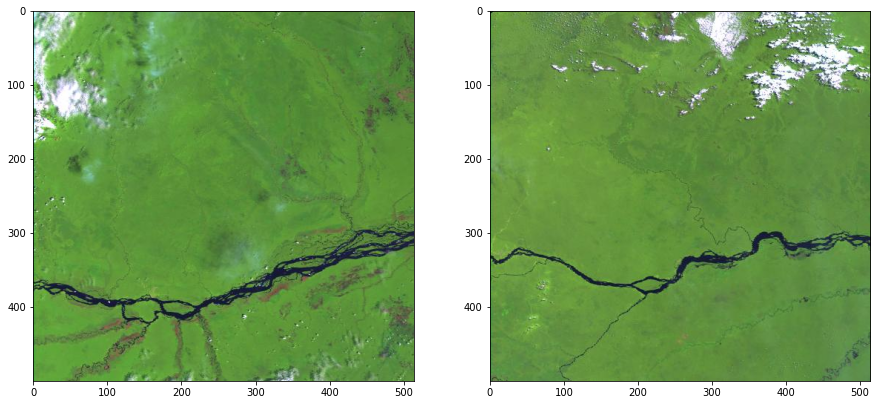

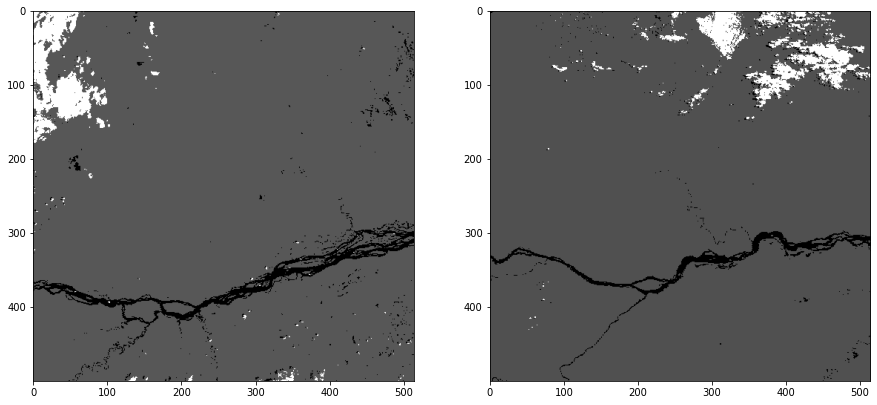

In [106]:
def apply_kmeans(img_kmeans, k, n):
    
    I_flat = np.reshape(img_kmeans, [img_kmeans.shape[0]*img_kmeans.shape[1], 3])
    
    # Initialise centroids in a matrix
    idx_centroids = np.sort(random.sample(range(0, img_kmeans.shape[0]*img_kmeans.shape[1]), k))
    C = np.zeros( (k, 3) )
    for i in range(k):
        C[i] = I_flat[idx_centroids[i]]

    # Creating clusters
    groups = np.zeros(img_kmeans.shape[0]*img_kmeans.shape[1]).astype(np.float32)
    n_attr = I_flat.shape[1]

    # Using K-Means method
    img_final_kmeans = k_means(img_kmeans, I_flat, k, n, C, groups, n_attr)

    # Normalising for each colour channel
    for i in range(3):
        img_final_kmeans[:,:,i] = normalization(img_final_kmeans[:,:,i], 0, 255)

    return img_final_kmeans

# Loading images
img_kmeans1 = iio.imread("../imagens/clouded/amaz22.jpg").astype(np.float32)
img_kmeans2 = iio.imread("../imagens/clouded/amaz19.jpg").astype(np.float32)

# Plot before k-means
plt.figure(figsize = (15, 15))
plt.subplot(2,2,1)
plt.imshow(img_kmeans1.astype(np.uint8),cmap="gray")
plt.subplot(2,2,2)
plt.imshow(img_kmeans2.astype(np.uint8),cmap="gray")

# Applying k-means
img_kmeans1 = apply_kmeans(img_kmeans1, 3, 20)
img_kmeans2 = apply_kmeans(img_kmeans2, 3, 20)

# Plot after k-means
plt.figure(figsize = (15, 15))
plt.subplot(2,2,3)
plt.imshow(img_kmeans1.astype(np.uint8),cmap="gray")
plt.subplot(2,2,4)
plt.imshow(img_kmeans2.astype(np.uint8),cmap="gray")

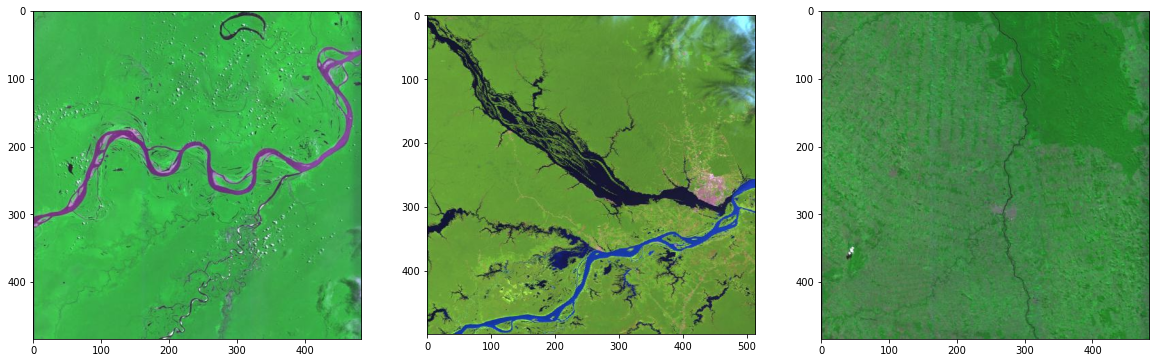

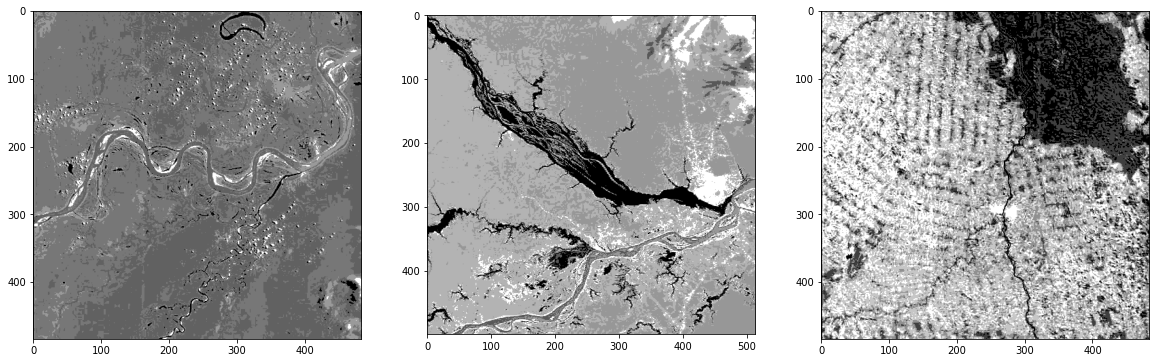

In [102]:
# Loading images
img_kmeans3 = iio.imread("../imagens/clean/amaz1.jpeg").astype(np.float32)
img_kmeans4 = iio.imread("../imagens/clean/amaz20.jpg").astype(np.float32)
img_kmeans5 = iio.imread("../imagens/clean/amaz13.jpg").astype(np.float32)

# Plot before k-means
plt.figure(figsize = (20, 20))
plt.subplot(2,3,1)
plt.imshow(img_kmeans3.astype(np.uint8),cmap="gray")
plt.subplot(2,3,2)
plt.imshow(img_kmeans4.astype(np.uint8),cmap="gray")
plt.subplot(2,3,3)
plt.imshow(img_kmeans5.astype(np.uint8),cmap="gray")

# Applying k-means
img_kmeans3 = apply_kmeans(img_kmeans3, 5, 10)
img_kmeans4 = apply_kmeans(img_kmeans4, 5, 10)
img_kmeans5 = apply_kmeans(img_kmeans5, 5, 10)

# Plot after k-means
plt.figure(figsize = (20, 20))
plt.subplot(2,3,4)
plt.imshow(img_kmeans3.astype(np.uint8),cmap="gray")
plt.subplot(2,3,5)
plt.imshow(img_kmeans4.astype(np.uint8),cmap="gray")
plt.subplot(2,3,6)
plt.imshow(img_kmeans5.astype(np.uint8),cmap="gray")